In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [53]:
social_N_data = pd.read_csv('Social_Network_Ads.csv')
pd.concat([social_N_data.head(), social_N_data.tail()])

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [54]:
social_N_data.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

<Axes: xlabel='Purchased', ylabel='count'>

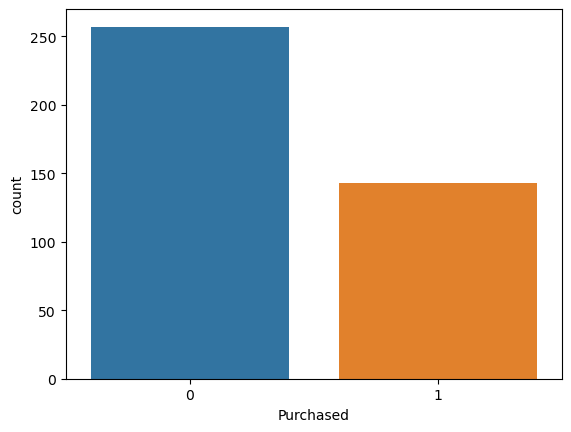

In [55]:
sns.countplot(x='Purchased', data=social_N_data)

<Axes: xlabel='Purchased', ylabel='count'>

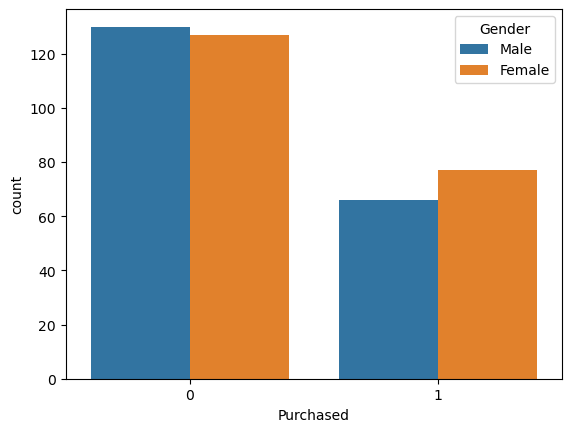

In [56]:
sns.countplot(x='Purchased', hue='Gender', data=social_N_data)

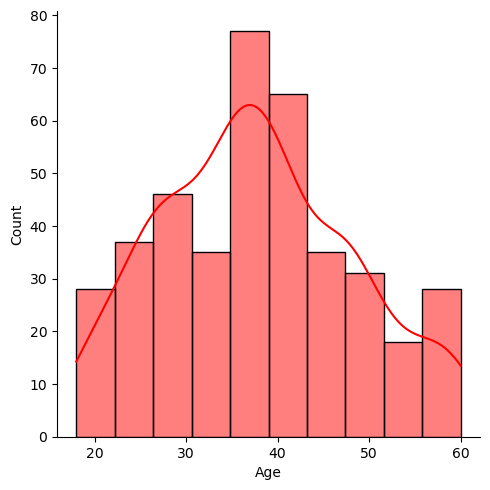

In [57]:
sns.displot(x='Age', data=social_N_data, color='red', kde=True)

In [58]:
social_N_data.drop('User ID', axis=1, inplace=True)

In [59]:
social_N_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [60]:
gender = pd.get_dummies(social_N_data['Gender'], drop_first=True)

In [61]:
social_N_data.drop('Gender',axis=1,inplace=True)

In [62]:
social_N_data = pd.concat([social_N_data,gender], axis=1)

In [63]:
X = social_N_data.iloc[:,[0,1,3]] # Age, EstimatedSalary and Male
X.head() 

,Age,EstimatedSalary,Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1


In [64]:
y = social_N_data.iloc[:, 2] # Purchased

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

In [66]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(360, 3)
(40, 3)
(360,)
(40,)


In [67]:
from sklearn.linear_model import LogisticRegression  
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [68]:
y_pred = classifier.predict(X_test)

In [69]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
332,0,0
111,0,0
352,1,1
205,0,1
56,0,0
379,1,1
81,0,0
214,0,1
142,0,0
110,0,0


In [70]:
classifier.coef_
# array([[2.36839196, 1.42929561, 0.20973787]])
classifier.intercept_ 
# array([-1.1352347])

array([-1.03526656])

In [71]:
print(classifier.predict_proba(X))

[[0.99821508 0.00178492]
 [0.95284423 0.04715577]
 [0.9883244  0.0116756 ]
 [0.97782867 0.02217133]
 [0.98911027 0.01088973]
 [0.96888967 0.03111033]
 [0.94909559 0.05090441]
 [0.44849167 0.55150833]
 [0.99049982 0.00950018]
 [0.8684215  0.1315785 ]
 [0.96298293 0.03701707]
 [0.98450343 0.01549657]
 [0.98173906 0.01826094]
 [0.9755508  0.0244492 ]
 [0.98926234 0.01073766]
 [0.91100652 0.08899348]
 [0.5938778  0.4061222 ]
 [0.68118455 0.31881545]
 [0.62008296 0.37991704]
 [0.58975644 0.41024356]
 [0.7082237  0.2917763 ]
 [0.48269307 0.51730693]
 [0.41684657 0.58315343]
 [0.76902396 0.23097604]
 [0.65686172 0.34313828]
 [0.63168659 0.36831341]
 [0.46835893 0.53164107]
 [0.63102471 0.36897529]
 [0.97085349 0.02914651]
 [0.98000253 0.01999747]
 [0.89150677 0.10849323]
 [0.77477968 0.22522032]
 [0.99821617 0.00178383]
 [0.98193472 0.01806528]
 [0.91820443 0.08179557]
 [0.94173814 0.05826186]
 [0.97005575 0.02994425]
 [0.95726116 0.04273884]
 [0.97107676 0.02892324]
 [0.99020093 0.00979907]


In [72]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[24,  2],
       [ 1, 13]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

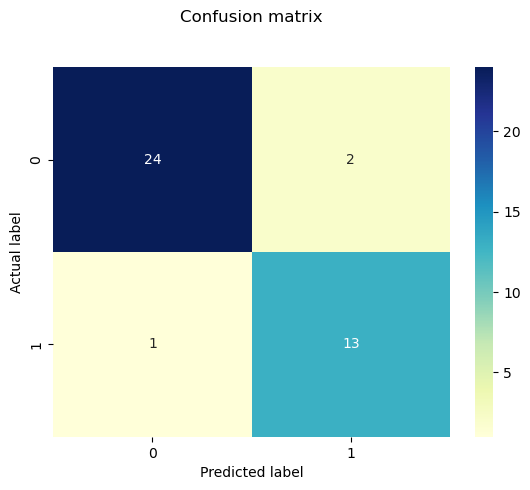

In [73]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [74]:
Accuracy = (63 + 34)/(63 + 34 + 9 + 14)
Accuracy
# 0.8083333333333333

# Also same result from sklearn accuracy_score
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)
#0.8083333333333333

0.925

In [77]:
# Chuẩn hóa các giá trị đặc trưng
new_data = scaler.transform([[46, 49000, 0]])  # Giới tính nữ được biểu diễn bằng 0

# Dự đoán với ngưỡng là 0.45
prediction = model.predict_proba(new_data)[:, 1] > 0.45

# In kết quả
print("Người dùng có mua hàng không với ngưỡng 0.45:", "Có" if prediction else "Không")


NameError: name 'scaler' is not defined